In [1038]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [1040]:
#Análise de Dados Operacionais de uma Empresa Modelo do Setor de Bicicletas e Acessórios

In [1043]:
# 1.Análise de estoque

# 1.1 Consulta de produtos em estoque (SQL)

#SELECT P.Name as Produtos, SUM(I.Quantity) as Em_Estoque
#FROM Production.ProductInventory I
#JOIN Production.Product P  on I.ProductID = P.ProductID
#GROUP BY P.Name
#HAVING SUM(I.Quantity) > 0
#ORDER BY Em_Estoque desc


In [1045]:
# 1.2 Leitura do arquivo CSV
df_estoque = pd.read_csv('prod_1.csv')

In [1047]:
# 1.3 Verificação inicial dos dados

#Verificação de quantas colunas e linhas possui;
#Identificação do tipo de dado;
#Identificação de valores nulos;
df_estoque.info()
#Verificação de valores duplicados
df_estoque.duplicated().sum()
#Print do topo da tabela para verificação visual
df_estoque.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Produtos;Estoque  428 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


,Produtos;Estoque
0,Hex Nut 7;1911
1,Hex Nut 23;1901
2,Thin-Jam Hex Nut 3;1901
3,Hex Nut 10;1888
4,Hex Nut 14;1880


In [1049]:
# 1.4 Correção e padronização dos Dados

#Substituição de espaços por _ para facilidar a divisão da coluna única por 2 colunas;
df_estoque['Produtos;Estoque'] = df_estoque['Produtos;Estoque'].str.replace(' ', '_')
#Disvisão da coluna única por 2 colunas;
df_estoque[['Produtos', 'Estoque']] = df_estoque['Produtos;Estoque'].str.split(';', expand=True)
#Retirada da coluna única remanescente;
df_estoque.drop('Produtos;Estoque', axis=1, inplace=True)
#Padronização dos dados
df_estoque['Produtos'] = df_estoque['Produtos'].str.strip().str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [1051]:
#Alteração do tipo de dados para futuras contas
df_estoque['Estoque'] = df_estoque['Estoque'].astype(int)
#Remoção de símbolos 
df_estoque['Produtos'] = df_estoque['Produtos'].replace(r'[^a-zA-Z0-9]',' ', regex=True)
#Padronização com a retirada dos espaços duplos
df_estoque['Produtos'] = df_estoque['Produtos'].replace(r'[\s+]',' ',regex=True)
df_estoque
                                                        

,Produtos,Estoque
0,hex nut 7,1911
1,hex nut 23,1901
2,thin jam hex nut 3,1901
3,hex nut 10,1888
4,hex nut 14,1880
...,...,...
423,paint black,47
424,short sleeve classic jersey l,36
425,bike wash dissolver,36
426,half finger gloves l,36


In [1053]:
#Avaliação da assimetria do grafico de unidades em estoque
skewness = df_estoque['Estoque'].skew()
print(f' O valor de Skewness é {skewness}')
print('Valores de referência:  ≈ 0, Gráfico normal; > 0, Gráfico com assimetria positiva; < 0, Gráfico com Assimetria negativa')
#O gráfico apresentou uma disposição com uma assimetria levemente positiva
#Alguns produtos se mostram com o estoque mais alto que a média 
#Porém a distorção é baixíssima
#O aumento de estoque de alguns produtos pode indicar uma redução da rotatividade dos produtos, a identificação de produtos sazonais, ou estratégicos

 O valor de Skewness é 0.39002228205122913
Valores de referência:  ≈ 0, Gráfico normal; > 0, Gráfico com assimetria positiva; < 0, Gráfico com Assimetria negativa


In [1055]:
#Dados estatísticos básicos
df_estoque.describe()

,Estoque
count,428.00
mean,784.99
std,572.10
min,36.00
25%,185.00
50%,796.50
75%,"1,111.50"
max,"1,911.00"


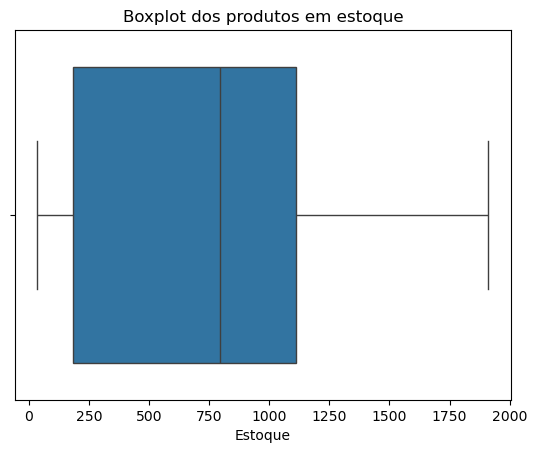

In [1233]:
#Identificação de outliers no estoque
sns.boxplot(x=df_estoque['Estoque'])
plt.title('Boxplot dos produtos em estoque')
plt.savefig('imagens/grafico_1.png', dpi=300, bbox_inches='tight')
plt.show()
#Não houveram Outliers nos dados do estoque

In [1059]:
# 1.5 Análise de produtos em estoque

#Verificação da quantidade total de produtos em estoque
estoque_total = df_estoque['Estoque'].sum()
print(f'A Quantidade TOTAL de produtos em estoque é {estoque_total}.')

A Quantidade TOTAL de produtos em estoque é 335974.


In [1061]:
#Os 10 produtos com maiores quantidades em estoque
estoque_MAX = df_estoque.sort_values('Estoque', ascending=False).head(10)
estoque_MAX

,Produtos,Estoque
0,hex nut 7,1911
2,thin jam hex nut 3,1901
1,hex nut 23,1901
3,hex nut 10,1888
4,hex nut 14,1880
5,metal tread plate,1837
6,hex nut 18,1824
7,hex nut 2,1808
8,hex nut 6,1781
9,thin jam hex nut 7,1781


In [1063]:
# Os 10 produtos com menores quantidades em estoque
estoque_MIN = df_estoque .sort_values('Estoque').head(10)
estoque_MIN

,Produtos,Estoque
427,women s tights l,36
424,short sleeve classic jersey l,36
426,half finger gloves l,36
425,bike wash dissolver,36
423,paint black,47
422,paint silver,65
421,short sleeve classic jersey xl,72
420,full finger gloves s,72
419,touring panniers large,72
418,men s bib shorts s,72


In [1066]:
# 2.Produtos zerados em estoque

# 2.1 Consulta dos dados no Banco (SQL)

#SELECT P.Name as Produtos, SUM(I.Quantity) as Em_Estoque
#FROM Production.ProductInventory I
#JOIN Production.Product P  on I.ProductID = P.ProductID
#GROUP BY P.Name
#HAVING SUM(I.Quantity) = 0
#ORDER BY Em_Estoque desc

In [1068]:
# 2.2 Leitura do arquivo CSV
df_zero = pd.read_csv('prod_2.csv')

In [1070]:
# 2.2 Verificação inicial dos dados
df_zero.info()
df_zero.duplicated().sum()
df_zero.head()
#Identificar a motivação: Se os produtos saíram de linha, possuem uma rotatividade muito alta ou houve algum erro durante a produção

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   produtos;estoque  4 non-null      object
dtypes: object(1)
memory usage: 164.0+ bytes


,produtos;estoque
0,Womens_Tights__M;0
1,Half_Finger_Gloves__M;0
2,Hitch_Rack___4_Bike;0
3,Short_Sleeve_Classic_Jersey__M;0


In [1072]:
# 2.3 Correção e padronização de dados
df_zero[['produtos', 'estoque']] = df_zero['produtos;estoque'].str.split(';',expand=True)
df_zero.drop('produtos;estoque', axis=1, inplace=True)
df_zero['produtos'] = df_zero['produtos'].str.replace('_',' ')
df_zero['produtos'] = df_zero['produtos'].str.strip().str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_zero['estoque'] = df_zero['estoque'].astype(int)
df_zero['produtos'] = df_zero['produtos'].replace(r'a-zA-Z0-9',' ',regex=True).replace(r'\s+',' ', regex=True)

In [1074]:
# 2.4 Produtos zerados no estoque
nome_prod = ', '.join(produto for produto in df_zero['produtos'])
print(f'Os produtos ausentes em estoque são: {nome_prod}')
df_zero
#Identificar a motivação: Se os produtos saíram de linha, possuem uma rotatividade muito alta ou houve algum erro durante a produção

Os produtos ausentes em estoque são: womens tights m, half finger gloves m, hitch rack 4 bike, short sleeve classic jersey m


,produtos,estoque
0,womens tights m,0
1,half finger gloves m,0
2,hitch rack 4 bike,0
3,short sleeve classic jersey m,0


In [1077]:
# 4.Verificação da localidade dos estoques que possuem maiores quantidades de produtos

# 4.1 Consulta de dados no Banco (SQL)

#SELECT I.LocationID as Localização, SUM(I.Quantity) as Quant_Estoque
#FROM Production.ProductInventory I 
#GROUP BY I.LocationID
#ORDER BY SUM(I.Quantity) desc

In [1079]:
# 4.2 Leitura dos dados em CSV

df_loc = pd.read_csv('prod_4.csv')

In [1081]:
# 4.3 Verificação de informações iniciais

df_loc.info()
df_loc.duplicated().sum()
df_loc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Localiazacao;Qtd_produtos  14 non-null     object
dtypes: object(1)
memory usage: 244.0+ bytes


,Localiazacao;Qtd_produtos
0,50;95477
1,6;83173
2,1;72899
3,60;20419
4,5;20295
5,7;17319
6,10;13584
7,2;5549
8,20;5165
9,30;958


In [1083]:
# 4.4 Limpeza e formatação de dados

df_loc[['Localizacao', 'Qtd_produtos']] = df_loc['Localiazacao;Qtd_produtos'].str.split(';',expand=True)
df_loc.drop('Localiazacao;Qtd_produtos', axis=1, inplace=True)
df_loc.columns.str.strip()
df_loc['Localizacao'] = 'Armazém ' + df_loc['Localizacao'].astype(str)
df_loc['Qtd_produtos'].astype(int)
df_loc

,Localizacao,Qtd_produtos
0,Armazém 50,95477
1,Armazém 6,83173
2,Armazém 1,72899
3,Armazém 60,20419
4,Armazém 5,20295
5,Armazém 7,17319
6,Armazém 10,13584
7,Armazém 2,5549
8,Armazém 20,5165
9,Armazém 30,958


In [1085]:
#Identificação da curva do grafico de frequência
skewness_loc = df_loc['Qtd_produtos'].skew()
skewness_loc

#Identificação de um gráfico assimétrico positivo
#Isso significa a presença de maiores volumes de produtos em determinados armazéns

1.4443122357207652

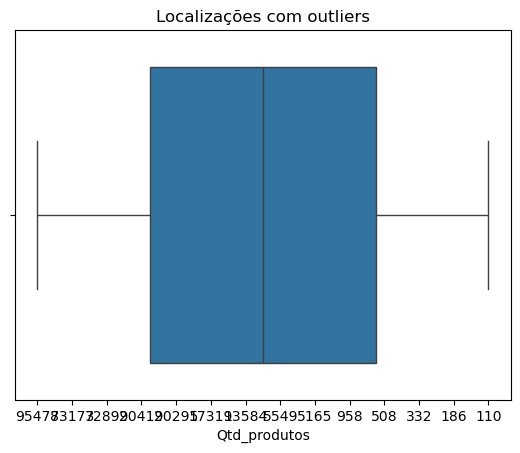

In [1235]:
#Identificação dos Outliers
sns.boxplot(x=df_loc['Qtd_produtos'])
plt.title('Localizações com outliers')
plt.savefig('imagens/grafico_2.png', dpi=300, bbox_inches='tight')
plt.show()

In [1089]:
#Analise do volume de produtos em estoque em cada localidade

#Dados do gráfico
df_grafico= df_loc.copy()
df_grafico['Qtd_produtos'] = df_grafico['Qtd_produtos'].astype(int)
df_grafico['porcentagem'] = (df_grafico['Qtd_produtos'] / df_grafico['Qtd_produtos'].sum())*100
df_grafico.loc[df_grafico['porcentagem']<4, 'Localizacao'] = 'Outros'
df_grafico = df_grafico.groupby('Localizacao', as_index= False)['Qtd_produtos'].sum()

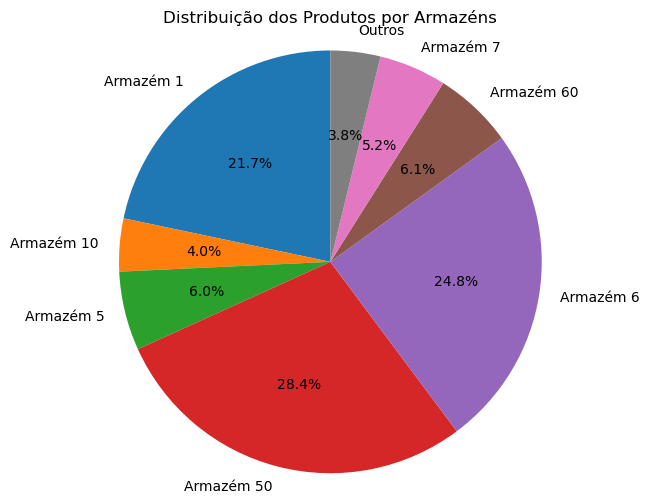

In [1237]:
#Criação do gráfico
labels = df_grafico['Localizacao']
valores = df_grafico['Qtd_produtos']
plt.figure(figsize=(6,6))
plt.pie(valores, labels=df_grafico['Localizacao'], autopct='%1.1f%%', startangle= 90)
plt.axis('equal')  
plt.title('Distribuição dos Produtos por Armazéns')
plt.savefig('imagens/grafico_3.png', dpi=300, bbox_inches='tight')
plt.show()
        


In [1093]:
#Análise Final

# Após a análise do gráfico, nota-se que cerca de 75% dos produtos armazenados apresentam-se em 3 armazéns principais: Armazém 50, Armazém 6 e Armazém 1.
# A concentração do armazenamento dos produtos em apenas 3 estoques pode ocasionar um gargalo operacional através da inoperância de algum deles.
# A Solução seria reavaliar a logísstica para descobrir se há a possibilidade de redistribuição do estoque.
# Além de verificar se, em uma possível inoperação dos principais armazéns, os outros apresentariam capacidade para suprir as demandas gerais.
# Outra saída seria avaliar o que diferencia esses 3 armazéns principais em questão de processos e infraestrutura para replicar nos outros armazéns e criar planos de contingência.


In [1095]:
# 5.Locais para onde os produtos sao mais vendidos, Ticket médio por região, Faturamento por região
#(Foi identificada uma Região com ticket médio elevado, mesmo com baixo volume de aquisição)

#SELECT TerritoryID as Território, 
#COUNT(SalesOrderID) as Pedidos_Territorio, 
#SUM(SubTotal) as Total_Compra,
#AVG(SubTotal) as Media_compra
#FROM Sales.SalesOrderHeader
#GROUP BY TerritoryID
#ORDER BY COUNT(SalesOrderID) desc

In [1097]:
# 5.1 Leitura do arquivo CSV

df_prod = pd.read_csv('prod_5.csv', sep=';',engine='python')

In [1099]:
# 5.2 Visualização inicial dos dados

df_prod.info()
df_prod.duplicated().sum()
df_prod.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Territorio    10 non-null     int64 
 1   Pedidos_uni   10 non-null     int64 
 2   Valor_total   10 non-null     object
 3   Media_compra  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


,Territorio,Pedidos_uni,Valor_total,Media_compra
0,9,6843,"10655335,96","1557,1147"
1,4,6224,"24184609,6","3885,702"
2,1,4594,"16084942,55","3501,2935"
3,6,4067,"16355770,46","4021,5811"
4,10,3219,"7670721,036","2382,9515"


In [1101]:
# 5.3 Limpeza dos dados

df_prod['Valor_total'] = df_prod['Valor_total'].str.replace(',','.',regex=False).astype(float)
df_prod['Media_compra'] = df_prod['Media_compra'].str.replace(',','.',regex=False).astype(float)
pd.set_option('display.float_format', '{:,.2f}'.format)
df_prod['Territorio'] = df_prod['Territorio'].astype(str)
df_prod

,Territorio,Pedidos_uni,Valor_total,Media_compra
0,9,6843,"10,655,335.96","1,557.11"
1,4,6224,"24,184,609.60","3,885.70"
2,1,4594,"16,084,942.55","3,501.29"
3,6,4067,"16,355,770.46","4,021.58"
4,10,3219,"7,670,721.04","2,382.95"
5,7,2672,"7,251,555.65","2,713.91"
6,8,2623,"4,915,407.60","1,873.96"
7,5,486,"7,879,655.07","16,213.28"
8,3,385,"7,909,009.01","20,542.88"
9,2,352,"6,939,374.48","19,714.13"


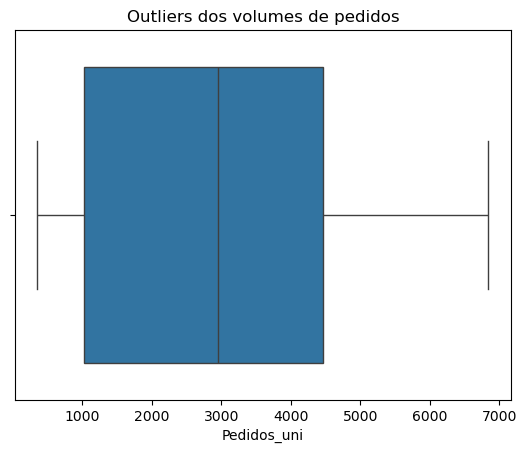

In [1239]:
#Identificação de outliers e análise da curva do número de pedidos
skewness_uni = df_prod['Pedidos_uni'].skew()
skewness_uni
#A curva do gráfico se apresenta muito próxima do normal
sns.boxplot(x=df_prod['Pedidos_uni'])
plt.title('Outliers dos volumes de pedidos')
plt.savefig('imagens/grafico_4.png', dpi=300, bbox_inches='tight')
plt.show()
#Não foram identificados outliers por meio do método IQR

O valor de skewness é 1.3672780632071229


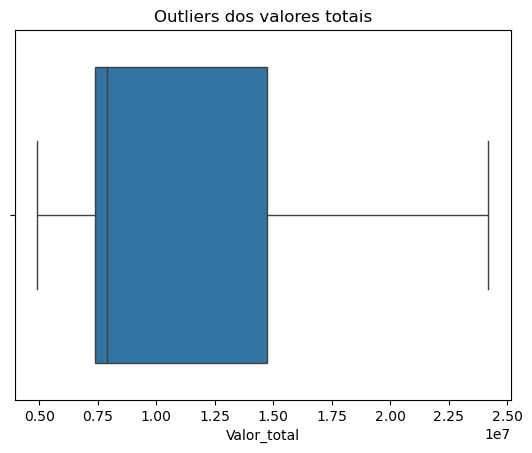

In [1243]:
#Identificação de outliers e análise da curva do valor total comprado
skewness_total = df_prod['Valor_total'].skew()
print(f'O valor de skewness é {skewness_total}')
#Curva apresenta assimetria positiva
sns.boxplot(x=df_prod['Valor_total'])
plt.title('Outliers dos valores totais')
plt.savefig('imagens/grafico_5.png', dpi=300, bbox_inches='tight')
plt.show()
#Não foram identificados outliers por meio do método IQR

O valor de skewness é 1.0647053292369748


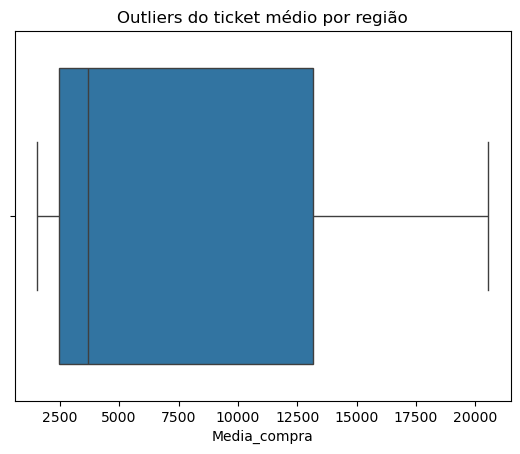

In [1247]:
#Identificação de outliers e análise da curva do Ticket médio por região
skewness_medio = df_prod['Media_compra'].skew()
print(f'O valor de skewness é {skewness_medio}')
#Curva apresenta assimetria positiva
sns.boxplot(x=df_prod['Media_compra'])
plt.title('Outliers do ticket médio por região')
plt.savefig('imagens/grafico_6.png', dpi=300, bbox_inches='tight')
plt.show()

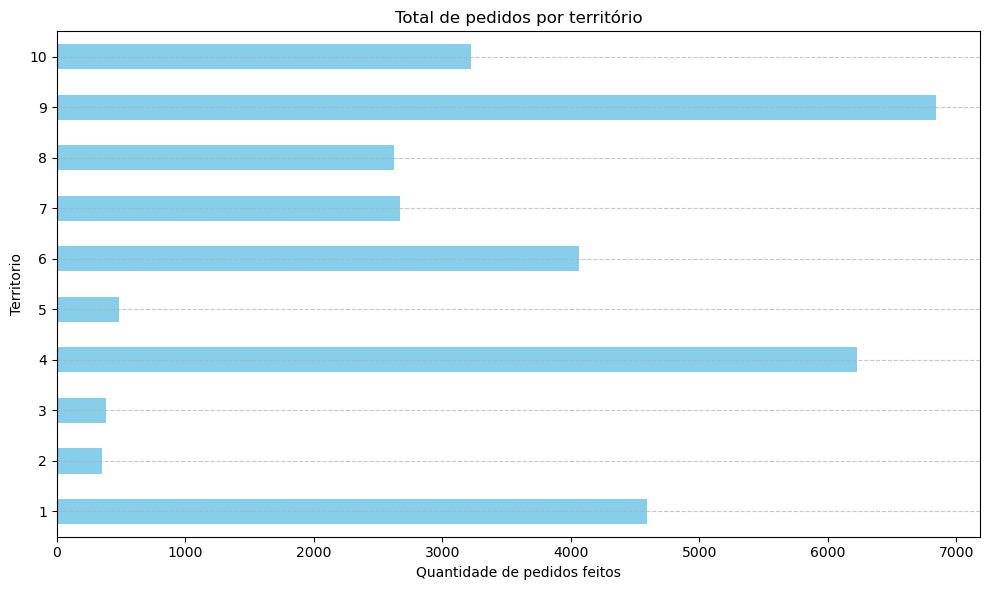

In [1249]:
# 5.4 Análise e gráfico dos locais por volume de compras(Quantidade)

df_graf = df_prod.copy()
df_graf['Territorio'] = df_graf['Territorio'].astype(int)
df_agrupado = df_graf.groupby('Territorio', as_index=True)['Pedidos_uni'].sum()

 #Gráfico
plt.figure(figsize=(10,6))
df_agrupado.plot(kind='barh', color='skyblue')
plt.title('Total de pedidos por território')
plt.ylabel('Territorio')
plt.xlabel('Quantidade de pedidos feitos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('imagens/grafico_7.png', dpi=300, bbox_inches='tight')
plt.show()


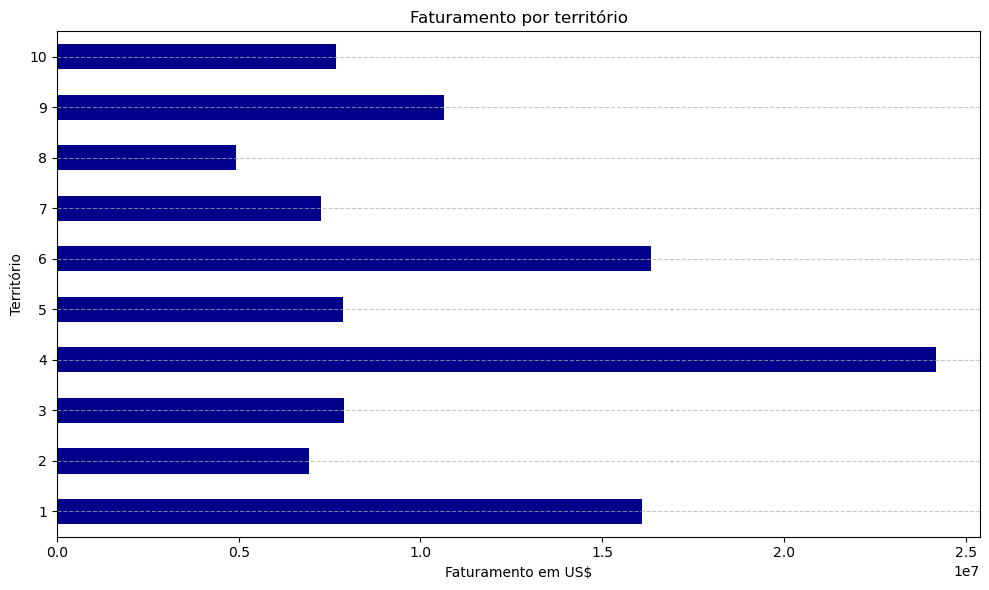

In [1251]:
# Analise do faturamento por territorio

df_agrupados2 = df_graf.groupby('Territorio', as_index=True)['Valor_total'].sum()

    #grafico
plt.figure(figsize=(10,6))
df_agrupados2.plot(kind='barh', color='darkblue')
plt.title('Faturamento por território')
plt.xlabel('Faturamento em US$')
plt.ylabel('Território')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('imagens/grafico_8.png', dpi=300, bbox_inches='tight')

plt.show()



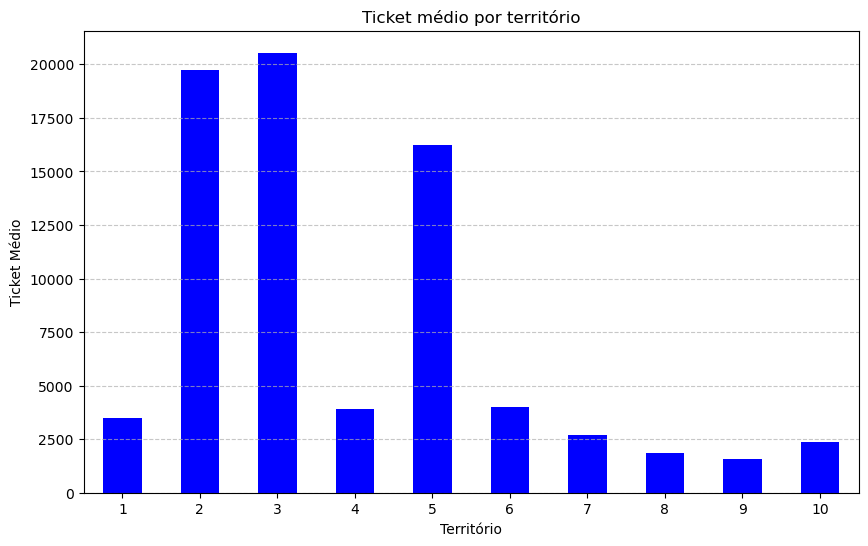

In [1253]:
# Análise do ticket médio por região

df_graf['porcentagem2'] = (df_graf['Media_compra'] / df_graf['Media_compra'].sum())*100
df_agrupados3 = df_graf.groupby('Territorio',as_index=True)['Media_compra'].sum()

    #grafico
plt.figure(figsize=(10,6))
df_agrupados3.plot(kind='bar', color='blue')
plt.title('Ticket médio por território')
plt.ylabel('Ticket Médio')
plt.xlabel('Território')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('imagens/grafico_9.png', dpi=300, bbox_inches='tight')

plt.show()


In [1114]:
#Análise

#Podemos observar no primeiro gráfico que os territórios que apresentam os maiores volumes de pedidos são os território 9, 4 e 1.
#Observamos também que os territórios que apresentam os menores volumes de pedidos são os territórios 5,3 e 2.
#Quando analisa-se o segundo gráfico percebemos que apesar dos territórios 5,3 e 4 apresentarem um volume de pedidos baixo, seu faturamento se equivale aos outros territórios com exceção dos 4 principais
#Porém quando visualizamos o último grafico relacionado ao ticket médio de cada região, as 3 regiões que antes apresentavam os menores volumes de pedidos, apresentam agora valores em ticket médio.
#Isso pode ser explicado pela provavel compra de produtos com alto valor unitário.
#Já os territórios 9 e 4, que apresentaram altíssimos volumes de compra, mostram-se com o ticket médio muito baixo, demonstrando possíevis clientes de volume

#Insights
#Os territórios 5,3 e 2 podem apresentar um possível mercado"premium" não explorado.
#Atendimento personalizado, campanhas de marketing e ofertas exclusivas podem aumentar o volume de compras, mantendo a qualidade
#Já nos territórios que apresentam maiores volumes de compras com baixas margens de lucro a utilização do metodo up-sell/cross-sell, pode ser bem util



In [1117]:
# 7.Verificação do tempo médio de produção de cada produto

#SELECT ProductID as Produto, AVG(DATEDIFF(DAY, StartDate, EndDate)) as Tempo_prod_medio_dias
#FROM Production.WorkOrder
#GROUP BY ProductID
#ORDER BY AVG(DATEDIFF(DAY, StartDate, EndDate)) DESC


In [1119]:
#Leitura do documento
df_tempo = pd.read_csv('prod_temp.txt', sep='\t', engine= 'python')

In [1121]:
#Visualização e informações iniciais
df_tempo.info()
df_tempo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Produto                238 non-null    int64
 1   Tempo_prod_medio_dias  238 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


,Produto,Tempo_prod_medio_dias
0,776,17
1,988,17
2,754,16
3,963,16
4,814,16
...,...,...
233,831,10
234,888,10
235,739,10
236,917,10


In [1123]:
#Identificação de dados duplicados e formatação do nome da coluna
df_tempo.duplicated().sum()
df_tempo = df_tempo.rename(columns={'Tempo_prod_medio_dias': 'Tempo_medio'})

O Valor de skew é -0.44131763586778805
O gráfico apresenta leve assimetria negativa


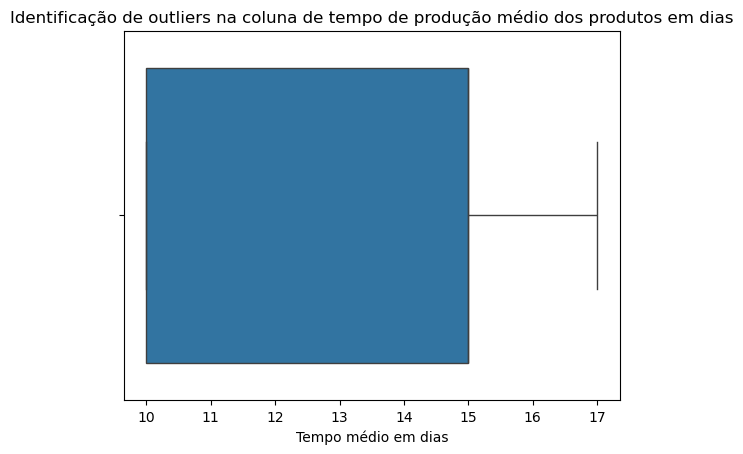

In [1255]:
#Identificação de outliers e análise da curva do tempo de produção médio(em dias)
skew_tempo = df_tempo['Tempo_medio'].skew()
print(f'O Valor de skew é {skew_tempo}')
print('O gráfico apresenta leve assimetria negativa')
#Gráfico outlier
sns.boxplot(x=df_tempo['Tempo_medio'])
plt.title('Identificação de outliers na coluna de tempo de produção médio dos produtos em dias')
plt.xlabel('Tempo médio em dias')
plt.savefig('imagens/grafico_10.png', dpi=300, bbox_inches='tight')

plt.show()

In [1127]:
#Análise estatística
Media_geral = df_tempo['Tempo_medio'].mean()
DPadrao = df_tempo['Tempo_medio'].std()
CV = (DPadrao / Media_geral)*100
print(f'A média geral do tempo de produção é de {Media_geral:.2f} dias')
print(f'O coeficiente de variação do tempo de produção foi de {CV:.2f}%')
df_tempo['Tempo_medio'].describe()

A média geral do tempo de produção é de 13.25 dias
O coeficiente de variação do tempo de produção foi de 19.25%


count   238.00
mean     13.25
std       2.55
min      10.00
25%      10.00
50%      15.00
75%      15.00
max      17.00
Name: Tempo_medio, dtype: float64

In [1129]:
#Análise descritiva e diagnóstica
#Inicialmente são 238 tipos de produtos produzidos
#Os produtos apresentam um tempo máximo médio de produção de 17 dias e mínimo médio de 10 dias
#O tempo médio geral de produção é de 13 dias e 6 horas
#Os dados não apresentaram valores discrepantes
#Foi detectado um coeficiente de variação do tempo médio de 19,25%
#O que significa que o processo de produção apresenta uma eficiencia razoável, mantendo uma certa previsibilidade e planejamento operacional

In [1132]:
# 8.Verificação dos 10 produtos mais fabricados

#SELECT TOP 10 ProductID as Produto, SUM(DISTINCT(OrderQty)) as Quant_Fabric
#FROM Production.WorkOrder
#GROUP BY ProductID
#ORDER BY SUM(DISTINCT(OrderQty)) desc


In [1146]:
#Leitura e formatação basica do arquivo
df_quant = pd.read_csv('quant_fabric.txt', sep='\t', engine='python')


In [1148]:
#Informações basicas sobre os dados
df_quant.info()
df_quant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Produto       238 non-null    int64
 1   Quant_Fabric  238 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


,Produto,Quant_Fabric
0,3,760270
1,532,415640
2,331,209088
3,316,209088
4,324,207820
...,...,...
233,978,156
234,751,151
235,943,150
236,989,143


In [1152]:
#Limpeza e padronização dos dados
df_quant['Quant_Fabric'] = df_quant['Quant_Fabric'].replace(',','', regex=True)
df_quant['Quant_Fabric'] = pd.to_numeric(df_quant['Quant_Fabric'], errors='coerce')

In [1156]:
#Identificação de dados duplicados
df_quant.duplicated().sum()
df_quant = df_quant.rename(columns={'Quant_Fabric': 'fabricados'})
df_quant['fabricados'].describe()

count       238.00
mean     16,197.36
std      63,282.34
min         104.00
25%         498.00
50%         910.00
75%       4,641.25
max     760,270.00
Name: fabricados, dtype: float64

A curva possui um skewness de 8.441272099536224


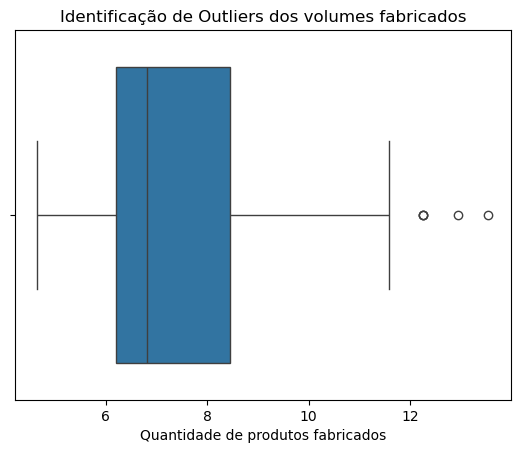

In [1257]:
#Análise de curvatura do gráfico e indentificação de Outliers
skew_quant = df_quant['fabricados'].skew()
print(f'A curva possui um skewness de {skew_quant}')
#A skewness dos dados nos dá a informação de que a curva de distribuição da quantidade produzida de produtos possui assimetria positiva grande
df_quant_log = np.log1p(df_quant['fabricados'])
#O gráfico teve que ser reformulado para escala logarítmica para facilitar a visualização dos dados
sns.boxplot(x=df_quant_log)
plt.title('Identificação de Outliers dos volumes fabricados')
plt.xlabel('Quantidade de produtos fabricados')
plt.savefig('imagens/grafico_11.png', dpi=300, bbox_inches='tight')

plt.show()

In [1160]:
#Calculo de IQR e os limites do boxplot
Q1 = df_quant['fabricados'].quantile(0.25)
Q3 = df_quant['fabricados'].quantile(0.75)
IQR = Q3 - Q1
limite_inf = max(0, Q1 - 1.5 * IQR)
limite_sup = Q3 + 1.5 * IQR
print(f'Limite inferior é {limite_inf}')
print(f'Limite superior é {limite_sup}')
print(f'O limite superior do Boxplot é {limite_sup} e o limite inferior do gráfico é {limite_inf}')

Limite inferior é 0
Limite superior é 10856.125
O limite superior do Boxplot é 10856.125 e o limite inferior do gráfico é 0


In [1162]:
#Outliers
outliers = df_quant[(df_quant['fabricados'] < limite_inf) | (df_quant['fabricados'] > limite_sup)]
print(outliers)
df_sem_outliers = df_quant[(df_quant['fabricados'] <= limite_sup)]

    Produto  fabricados
0         3      760270
1       532      415640
2       331      209088
3       316      209088
4       324      207820
5       401      106868
6       350      104544
7       531      104544
8       534      103910
9       399      103910
10      327      103910
11      533      103910
12      329       81210
13      529       80771
14      398       80771
15      945       77465
16      894       76936
17      328       53176
18      806       52466
19      950       51884
20      400       51511
21      804       40050
22      802       38938
23      994       36355
24      330       26130
25      803       22730
26      995       22617
27      826       20664
28      811       20135
29      517       19922
30      818       19922
31      996       18235
32      824       14543
33      810       14347
34      816       13964
35      516       13931
36      829       12789
37      821       12789
38      819       12336
39      949       12248
40      805     

In [582]:
df_sem_outliers

,Produto,fabricados
46,813,8299
47,820,8224
48,828,7915
49,519,7823
50,947,7745
...,...,...
233,978,156
234,751,151
235,943,150
236,989,143


In [584]:
#Determinação do número de classes(bins)
n = len(df_sem_outliers['fabricados'])
k = 2 * (n ** (1/3))
print(f'Serão {math.ceil(k)} classes de frequência')

Serão 12 classes de frequência


In [1164]:
#Determinação da amplitude das classes
#Determinando a amplitude total 
at = (df_sem_outliers['fabricados'].max()) - (df_sem_outliers['fabricados'].min())
#Determinando a amplitude da classe
h = at / k
print(f'Determinou-se que a amplitude das classes será de {h}')

Determinou-se que a amplitude das classes será de 710.2619554129315


In [1166]:
df_sem_outliers['fabricados'].describe()

count     192.00
mean    1,314.46
std     1,605.07
min       104.00
25%       416.00
50%       742.00
75%     1,404.00
max     8,299.00
Name: fabricados, dtype: float64

In [1168]:
#Criação da tabela em classes de frequência
df_sem_outliers = df_sem_outliers.copy()
bins = np.arange(df_sem_outliers['fabricados'].min(), (df_sem_outliers['fabricados'].max() + h), h)
df_sem_outliers['classes'] = pd.cut(df_sem_outliers['fabricados'], bins=bins)

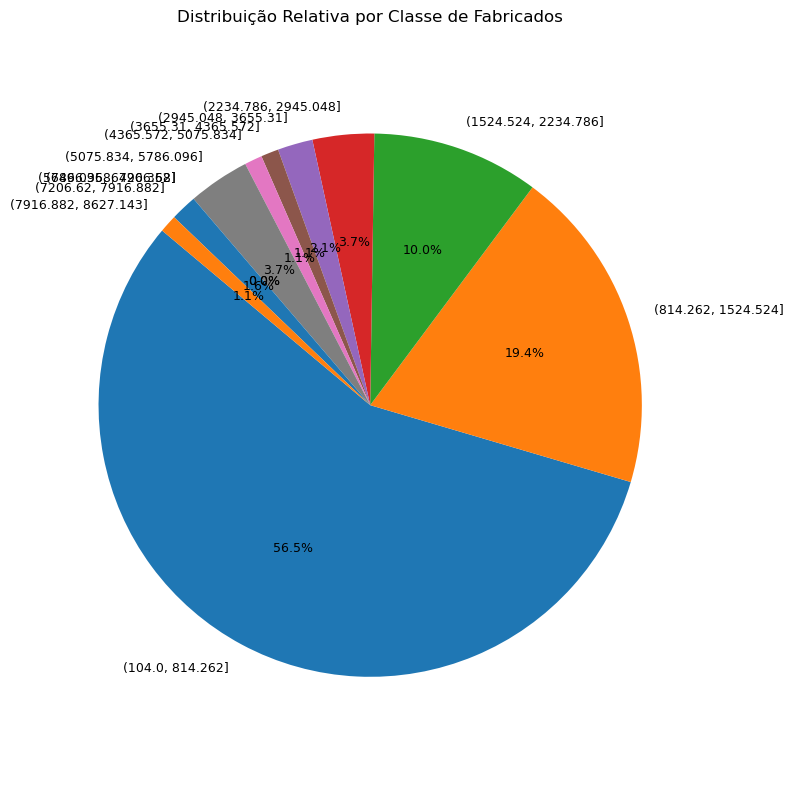

In [1259]:
#Visualização das classes de frequência relativa %
classes = df_sem_outliers['classes'].value_counts().sort_index()
f_relativa = classes / classes.sum()

# Labels (as classes em formato string)
labels = classes.index.astype(str)

# Valores (frequência relativa em %)
sizes = (f_relativa.values * 100).round(2)

# Plot do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 9})
plt.title('Distribuição Relativa por Classe de Fabricados')
plt.axis('equal')  # Deixa o círculo redondo
plt.tight_layout()
plt.savefig('imagens/grafico_12.png', dpi=300, bbox_inches='tight')

plt.show()

In [1172]:
#Top 10 Produtos mais fabricados sem outliers
df_sem_outliers.sort_values('fabricados', ascending=False).head(10)

,Produto,fabricados,classes
46,813,8299,"(7916.882, 8627.143]"
47,820,8224,"(7916.882, 8627.143]"
48,828,7915,"(7206.62, 7916.882]"
49,519,7823,"(7206.62, 7916.882]"
50,947,7745,"(7206.62, 7916.882]"
51,808,5637,"(5075.834, 5786.096]"
52,815,5467,"(5075.834, 5786.096]"
53,946,5269,"(5075.834, 5786.096]"
54,825,5268,"(5075.834, 5786.096]"
55,520,5213,"(5075.834, 5786.096]"


In [1174]:
#Análise e insights
#Os dados apresentaram uma grande assimetria positiva com vários outliers presentes na cauda à direita
#Isso nos informa sobre a maioria dos produtos produzidos estarem em faixas baixas, apesar de existirem valores extremos que distorcem a média.
#Essa assimetria exagerada pode indicar problemas de inconsistências na produção, gargalos ou até produtos chave para a empresa.
#Mais de 56% dos produtos fabricados possuem um volume de fabricação entre 104 e 814 produtos, seguidos de 19% entre 814 e 1524 produtos.Estando entre os menores volumes de produção da empresa.
#Esse dado pode indicar um portfolio de produtos sem padronização ou muito diverso, o que reduz a eficiência produtiva a partir da criação de várias linhas de produção para pequenas quantidades de produtos.
#Também pode indicar a ociosidade de recursos incluindo de pessoal, maquinario e/ou tempo
#Para os produtos que apresentarem baixa saída, uma solução seria interromper a produção desses produtos específicos ou reformular suas versões.


In [1177]:
# 9.Principais motivos de falhas na produção

#SELECT SUM(W.ScrappedQTY) as Prod_Descartados, S.Name as Motivo_Falha
#FROM Production.WorkOrder W
#JOIN Production.ScrapReason S on S.ScrapReasonID = W.ScrapReasonID
#GROUP BY S.Name
#ORDER BY SUM(W.ScrappedQTY) DESC

In [1179]:
#Leitura do arquivo
df_falhas = pd.read_csv('falhas.txt', sep='\t')

In [1181]:
#Informações iniciais sobre os dados
df_falhas.info()
df_falhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Prod_Descartados  16 non-null     int64 
 1   Motivo_Falha      16 non-null     object
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


,Prod_Descartados,Motivo_Falha
0,1271,Paint_process_failed
1,981,Trim_length_too_long
2,876,Thermoform_temperature_too_low
3,826,Drill_size_too_small
4,804,Wheel_misaligned
5,763,Trim_length_too_short
6,762,Drill_pattern_incorrect
7,743,Primer_process_failed
8,692,Seat_assembly_not_as_ordered
9,575,Gouge_in_metal


In [1183]:
#Identificação de duplicatas
df_falhas.duplicated().sum()

0

In [1185]:
#Formatação e limpeza dos dados
df_falhas['Motivo_Falha'] = df_falhas['Motivo_Falha'].str.lower().str.normalize('NFKD')
df_falhas['Motivo_Falha'] = df_falhas['Motivo_Falha'].str.replace('_', ' ')


In [1187]:
df_falhas

,Prod_Descartados,Motivo_Falha
0,1271,paint process failed
1,981,trim length too long
2,876,thermoform temperature too low
3,826,drill size too small
4,804,wheel misaligned
5,763,trim length too short
6,762,drill pattern incorrect
7,743,primer process failed
8,692,seat assembly not as ordered
9,575,gouge in metal


O gráfico apresenta uma skew de 0.32841622338980425


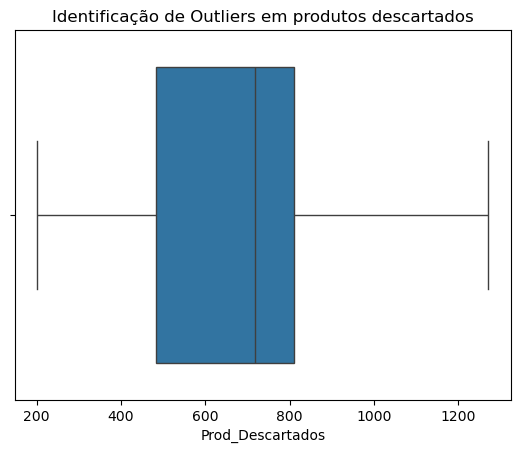

In [1261]:
#Identificação de outliers e análise da assimetria
skew_falhas = df_falhas['Prod_Descartados'].skew()
print(f'O gráfico apresenta uma skew de {skew_falhas}')
#O grafico apresentou um desvio muito proximo à normal
sns.boxplot(x=df_falhas['Prod_Descartados'])
plt.title('Identificação de Outliers em produtos descartados')
plt.savefig('imagens/grafico_13.png', dpi=300, bbox_inches='tight')

plt.show()

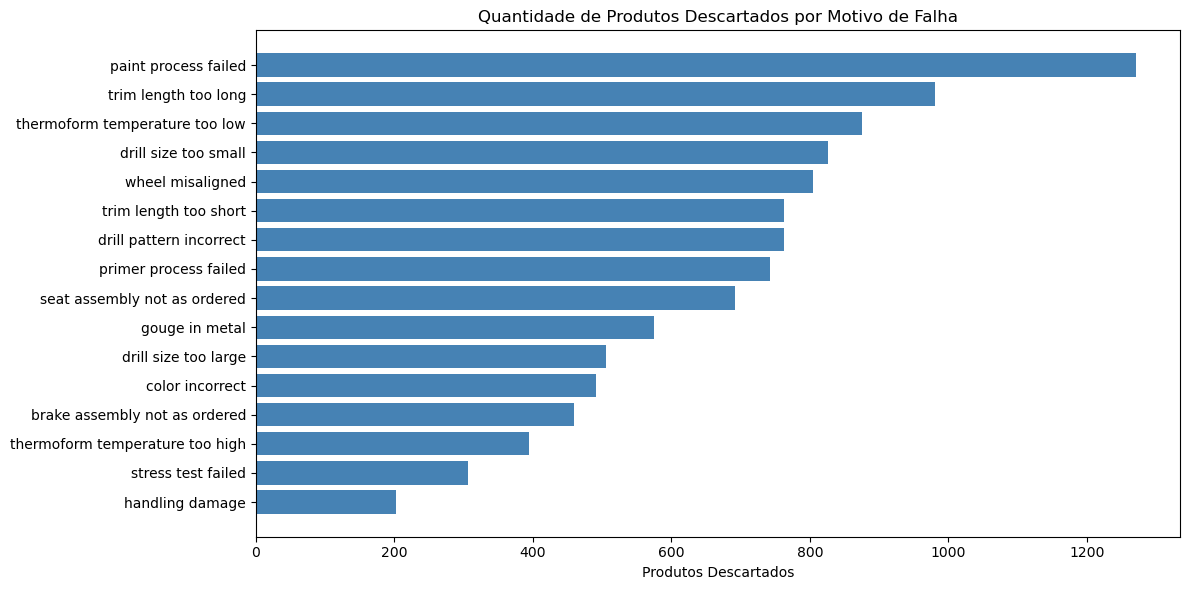

In [1263]:
#análise gráfica
plt.figure(figsize=(12, 6))
plt.barh(df_falhas['Motivo_Falha'], df_falhas['Prod_Descartados'], color='steelblue')
plt.xlabel('Produtos Descartados')
plt.title('Quantidade de Produtos Descartados por Motivo de Falha')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('imagens/grafico_14.png', dpi=300, bbox_inches='tight')

plt.show()

In [1193]:
# A falha que gera o maior número de descartes para a empresa é a falha durante o processo de pintura
#Há a possibilidade de ser um processo muito comum em vários tipos de produtos durante a produção
#Mas também há a possibilidade de algum erro mecânico,humano ou na tinta utilizada.
#Soluções possiveis para esses problemas seriam realizar testes com as tintas utilizadas, melhorar a capacitação dos funcionários e realizar a manutenção frequênte da maquinaria a fim de reduzir pordas futuras.

In [1196]:
# 10.Os 10 Principais produtos que mais apresentam falhas na produção

#SELECT TOP 15 P.Name as Nome_prod, SUM(S.ScrappedQty) as Quant_Falha_fabri
#FROM Production.Product P
#JOIN Production.WorkOrder S on S.ProductID = P.ProductID
#GROUP BY P.Name
#ORDER BY SUM(S.ScrappedQty) DESC

In [1198]:
#Leitura do arquivo em .txt
df_pfalhas = pd.read_csv('prod_falhas.txt', sep='\t')
df_pfalhas

,Nome_prod,Quant_Falha_fabri
0,Fork_End,1374
1,Seat_Stays,1154
2,BB_Ball_Bearing,1031
3,Blade,736
4,Fork_Crown,692
...,...,...
233,"LL_Touring_Frame_-_Blue,_50",0
234,"LL_Touring_Frame_-_Blue,_58",0
235,"LL_Touring_Frame_-_Blue,_62",0
236,"ML_Mountain_Frame_-_Black,_38",0


In [1200]:
#Informações basicas
df_pfalhas.info()
df_pfalhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nome_prod          238 non-null    object
 1   Quant_Falha_fabri  238 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


,Nome_prod,Quant_Falha_fabri
0,Fork_End,1374
1,Seat_Stays,1154
2,BB_Ball_Bearing,1031
3,Blade,736
4,Fork_Crown,692
...,...,...
233,"LL_Touring_Frame_-_Blue,_50",0
234,"LL_Touring_Frame_-_Blue,_58",0
235,"LL_Touring_Frame_-_Blue,_62",0
236,"ML_Mountain_Frame_-_Black,_38",0


In [1202]:
#Identifucação de Dados duplicados
df_pfalhas.duplicated().sum()

0

In [1204]:
#Identificação de valores nulos
df_pfalhas.isnull().sum()

Nome_prod            0
Quant_Falha_fabri    0
dtype: int64

In [1206]:
#Identificação de valores faltantes
df_pfalhas.isna().sum()

Nome_prod            0
Quant_Falha_fabri    0
dtype: int64

In [1208]:
#Limpeza e formatação
df_pfalhas.rename(columns={'Nome_prod' : 'Nome do produto'}, inplace=True)
df_pfalhas.rename(columns={'Quant_Falha_fabri' : 'Numero de falhas'}, inplace=True)
df_pfalhas['Nome do produto'] = df_pfalhas['Nome do produto'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_pfalhas['Nome do produto'] = df_pfalhas['Nome do produto'].replace(r'[^a-zA-Z0-9]', ' ', regex=True)
df_pfalhas['Nome do produto'] = df_pfalhas['Nome do produto'].replace(r'[\s+]', ' ', regex=True)
df_pfalhas['Numero de falhas'] = df_pfalhas['Numero de falhas'].replace(r'[\s+]', ' ', regex=True)

Os dados apresentam uma skew de 5.575699494646272


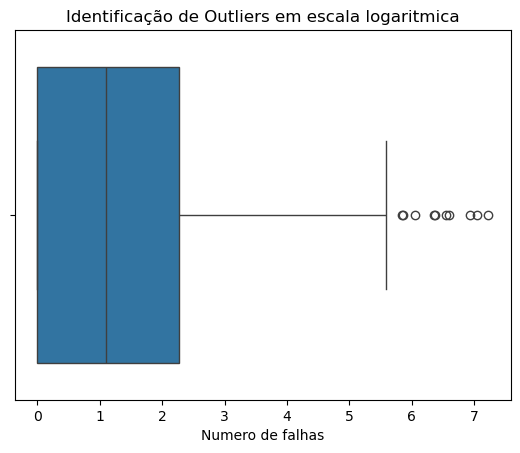

In [1265]:
#Identificação de outliers e analise de assimetria
skew_pfalhas = df_pfalhas['Numero de falhas'].skew()
print(f'Os dados apresentam uma skew de {skew_pfalhas}')
df_pfalhas_log = np.log1p(df_pfalhas['Numero de falhas'])
sns.boxplot(x=df_pfalhas_log)
plt.title('Identificação de Outliers em escala logaritmica')
plt.savefig('imagens/grafico_15.png', dpi=300, bbox_inches='tight')

plt.show()

In [1212]:
df_pfalhas.describe()

,Numero de falhas
count,238.00
mean,44.75
std,163.28
min,0.00
25%,0.00
50%,2.00
75%,8.75
max,"1,374.00"


In [1214]:
#Identificação dos outliers por IQR
Q1 = df_pfalhas['Numero de falhas'].quantile(0.25)
Q3 = df_pfalhas['Numero de falhas'].quantile(0.75)
IQR = Q3 - Q1
limite_inf = max(0, Q1 - 1.5 * IQR)
limite_sup = Q3 + 1.5 * IQR
outlier_p = df_pfalhas[(df_pfalhas['Numero de falhas'] > limite_sup)]
outlier_p

,Nome do produto,Numero de falhas
0,fork end,1374
1,seat stays,1154
2,bb ball bearing,1031
3,blade,736
4,fork crown,692
5,chain stays,585
6,down tube,571
7,stem,422
8,head tube,348
9,seat tube,342


In [1216]:
#Produtos sem outliers
s_outlier = df_pfalhas[(df_pfalhas['Numero de falhas'] < limite_sup)]
s_outlier

,Nome do produto,Numero de falhas
41,ml fork,21
42,ml road front wheel,19
43,hl road handlebars,18
44,ll crankset,17
45,ll mountain seat assembly,17
...,...,...
233,ll touring frame blue 50,0
234,ll touring frame blue 58,0
235,ll touring frame blue 62,0
236,ml mountain frame black 38,0


In [1218]:
#Avaliando a uniformidade das falhas com e sem outliers
CV_geral = (df_pfalhas['Numero de falhas'].std()) / (df_pfalhas['Numero de falhas'].mean()) *100
CV_normal =(s_outlier['Numero de falhas'].std()) / (s_outlier['Numero de falhas'].mean()) *100
print(f'O coeficiente de variação geral das falhas é de {CV_geral:.2f}%')
print(f'Já o coeficiente de variação sem os outliers é de {CV_normal:.2f}%')                                                     

O coeficiente de variação geral das falhas é de 364.86%
Já o coeficiente de variação sem os outliers é de 147.83%


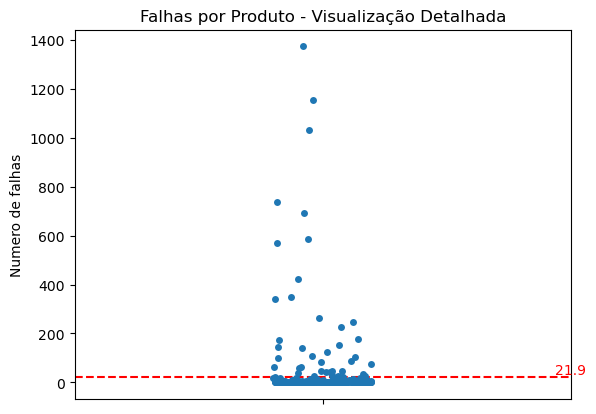

In [1267]:
#Grafico da dispersão das falhas 
sns.stripplot(data=df_pfalhas, y='Numero de falhas', jitter=True)
plt.axhline(limite_sup, color='red', linestyle='--', label=f'Limite superior ({limite_sup:.1f})')
plt.text(0.5, limite_sup + 1, f'{limite_sup:.1f}', color='red', ha='center', va='bottom')
plt.title('Falhas por Produto - Visualização Detalhada')
plt.savefig('imagens/grafico_16.png', dpi=300, bbox_inches='tight')

plt.show()

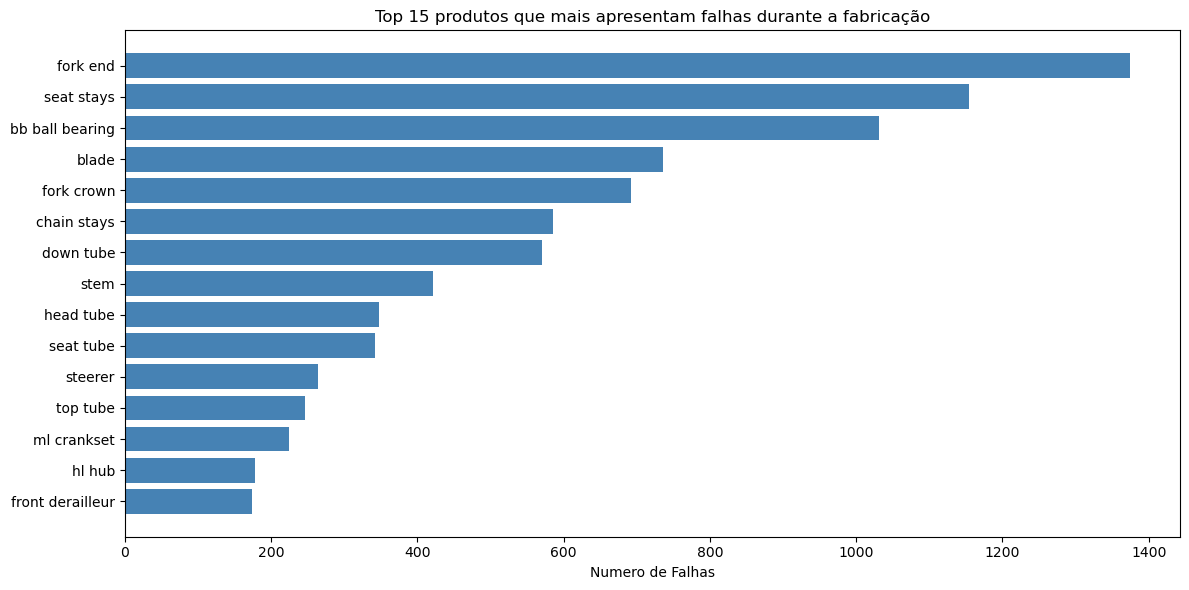

In [1269]:
#Gráfico dos 15 produtos que mais apresentam falhas
grafico_by = outlier_p.groupby('Nome do produto')['Numero de falhas'].sum().sort_values(ascending=False).head(15)
grafico_df = grafico_by.reset_index()
plt.figure(figsize=(12, 6))
plt.barh(grafico_df['Nome do produto'], grafico_df['Numero de falhas'], color='steelblue')
plt.xlabel('Numero de Falhas')
plt.title('Top 15 produtos que mais apresentam falhas durante a fabricação')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('imagens/grafico_17.png', dpi=300, bbox_inches='tight')

plt.show()

In [1224]:
#Análise
#Durante a análise da simetria do gráfico, notou-se a skewness muito elevada, indicando uma distribuição com assimetria positiva e uma cauda muito relevante
#Além disso, foi possível detectar a presença de inumeros outliers que deslocavam a posição original da média
#Após a aferição do Coeficiente de variação, tando dos dados gerais, quanto dos dados sem outliers, notou-se que a distribuição dos valores de falhas já se mostrava extremamente alterada, mesmo sem os impactos dos valores extremos.
#Os valores extremos do CV indicam uma grande dispersão da distribuição das falhas durante a produção.
#Isso indica uma baixa previsibilidade no processo de produção e que certos produtos vem apresentando falhas frequentes ao longo do processo.
#Seria necessário avaliar quais contextos levam às falhas encontradas
#Dentre as possíveis soluções teríamos reavaliar os processos de produção, incluindo maquinário e pessoal, além de reavaliar a necessidade e o impacto que a interrupção da produção que determinados produtos causariam